# 实战PP-TinyPose：如何构建移动端模型
## PP-TinyPose 简介
![](https://ai-studio-static-online.cdn.bcebos.com/e60c1b44538d4d2dbeaeda665b1f2a2f05cc4acb17694229b955d2e9ea03c8a5)

PP-TinyPose是PaddleDetecion针对移动端设备优化的实时姿态检测模型，可流畅地在移动端设备上执行多人姿态估计任务。借助PaddleDetecion自研的优秀轻量级检测模型[PicoDet](https://github.com/zoooo0820/PaddleDetection/blob/develop/configs/picodet/README.md),我们同时提供了特色的轻量级垂类行人检测模型。

![](https://ai-studio-static-online.cdn.bcebos.com/28873d29c0d24464a58edc8774b45dff3d8b3f60603c4b149c7448ed06327769)


## PaddleDetection 简介
PaddleDetection是基于飞桨PaddlePaddle的端到端目标检测套件，提供多种主流目标检测、实例分割、跟踪、关键点检测算法，目前推出多种服务器端和移动端工业级SOTA模型，并集成了模型压缩和跨平台高性能部署能力,能帮助开发者更快更好完成端到端全开发流程。

- Github地址：https://github.com/PaddlePaddle/PaddleDetection
- Gitee地址：https://gitee.com/PaddlePaddle/PaddleDetection

![](https://ai-studio-static-online.cdn.bcebos.com/fa48468402524bada232db8e10e4fbaee60f7a1b27274aa893729300d766328e)

## 动手实践
### 准备代码与运行环境
下载PaddleDetection代码并完成环境配置

In [1]:
# 下载PaddleDetection代码
!git clone https://gitee.com/paddlepaddle/PaddleDetection.git

fatal: destination path 'PaddleDetection' already exists and is not an empty directory.


In [2]:
# 安装相关环境依赖
!pip install --upgrade pip -i https://mirror.baidu.com/pypi/simple
# !pip install paddlepaddle-gpu==2.2.0.post101 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html -i https://mirror.baidu.com/pypi/simple
!cd PaddleDetection && pip install --upgrade -r requirements.txt -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 1.7MB 7.7MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 76 kB 6.2 MB/s             
     |████████████████████████████████| 2.7 MB 19.4 MB/s            
     |████████████████████████████████| 60.4 MB 10.3 MB/s            
     |████████████████████████████████| 596 kB 15.7 MB/s            
     |████████████████████████████████| 1.1 MB 15.4 MB/s            
     |████████████████████████████████| 38.1 MB 9.0 MB/s             
     |████████████████████████████████| 1.9 MB 24.4 MB/s            
     |████████████████████████████████| 106 kB 23.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 953 kB 15.6 MB/s            
     |████████████████████████████████| 1.5 

- 使用下面的命令将默认工作目录切换到PaddleDetection文件夹下

In [3]:
import os
os.chdir("./PaddleDetection/")

!pwd

/home/aistudio/PaddleDetection


### 准备训练数据

1. 如果需要实现自定义数据的训练，需要将自定义的数据集转成COCO格式，具体可参考[关键点数据准备文档]。(https://github.com/PaddlePaddle/PaddleDetection/blob/release/2.3/docs/tutorials/PrepareKeypointDataSet_cn.md)
2. 在对应的配置文件(.yml)中，修改标注文件路径、数据路径等，使其与希望使用的自定义数据集一致。


在本项目中，我们准备了一个mini数据集。您可以通过这个mini数据集，体验如何走通整个训练流程。

In [8]:
# 下载/解压数据集,并整理数据集路径
!wget https://bj.bcebos.com/v1/paddledet/data/keypoint/coco_val_person_mini.tar
!tar -xf coco_val_person_mini.tar -C ./dataset/
!cp -r ./dataset/coco_val_person_mini/* ./dataset/coco
!cp ./dataset/coco/annotations/aic_coco_train_cocoformat.json ./dataset/
!cp ./dataset/coco/annotations/instances_val2017.json ./dataset/coco/annotations/person_keypoints_val2017.json

--2021-12-29 15:58:48--  https://bj.bcebos.com/v1/paddledet/data/keypoint/coco_val_person_mini.tar
Resolving bj.bcebos.com (bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to bj.bcebos.com (bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 488376320 (466M) [application/x-tar]
Saving to: ‘coco_val_person_mini.tar’

coco_val_person_min 100%[===================>] 465.75M  62.0MB/s    in 9.8s    

2021-12-29 15:58:58 (47.4 MB/s) - ‘coco_val_person_mini.tar’ saved [488376320/488376320]



### 开始训练
- 训练PicoDet行人检测模型

In [9]:
!python tools/train.py -c configs/picodet/application/pedestrian_detection/picodet_s_320_pedestrian.yml \
        -o pretrain_weights=https://paddledet.bj.bcebos.com/models/picodet_s_320_coco.pdparams \
        --eval        

- 训练TinyPose关键点检测模型

In [ ]:
!python tools/train.py -c configs/keypoint/tiny_pose/tinypose_128x96.yml

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:130: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
loading annotations into memory...
Done (t=0.29s)
creating index...
index created!
W1230 10:31:43.865355   632 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W1230 10:31:43.871608   632 device_context.cc:465] device: 0, cuDNN Version: 7.6.
[12/30 10:31:51] ppdet.engine INFO: Epoch: [0] [ 0/11] learning_rate: 0.000008 loss: 0.002323 eta: 5:51:56 batch_cost: 4.5706 data_cost: 3.5480 ips: 112.0195 images/s


- 上述模型训练完成后，默认会分别保存在`output/picodet_s_320_pedestrian`和`output/tinypose_128x96`文件夹下

### 模型评估
当训练完成后，使用下面的命令评估模型的精度。这里使用了我们已经训练好的模型。如希望使用自己训练的模型，请对应将`weights=`后的值更改为对应模型`.pdparams`文件的存储路径。

In [4]:
# 行人检测模型
!python tools/eval.py -c configs/picodet/application/pedestrian_detection/picodet_s_320_pedestrian.yml \
  -o weights=https://paddledet.bj.bcebos.com/models/picodet_s_320_pedestrian.pdparams

#关键点检测模型
!python tools/eval.py -c configs/keypoint/tiny_pose/tinypose_128x96.yml \
  -o weights=https://bj.bcebos.com/v1/paddledet/models/keypoint/tinypose_128x96.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:130: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
W1230 11:40:28.936209   516 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W1230 11:40:28.941388   516 device_context.cc:465] device: 0, cuDNN Version: 7.6.
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
[12/30 11:40:32] ppdet.utils.download INFO: Downloading picodet_s_320_pedestrian.pdparams from https://paddledet.bj.bcebos.com/models/picodet_s_320_pedestrian.pdparams
100%|█████████████████████████████████████| 3885/3885 [00:00<00:00, 4403.22KB/

### 模型导出
分别将行人检测、关键点检测模型导出，这里使用了我们已经训练好的模型。如希望使用自己训练的模型，请对应将`weights=`后的值更改为对应模型`.pdparams`文件的存储路径。导出的模型将默认存储在`output_inference/`路径下

In [5]:
# 导出行人检测模型
!python tools/export_model.py -c configs/picodet/application/pedestrian_detection/picodet_s_320_pedestrian.yml \
        -o weights=https://paddledet.bj.bcebos.com/models/picodet_s_320_pedestrian.pdparams

# 导出关键点检测模型
!python tools/export_model.py -c configs/keypoint/tiny_pose/tinypose_128x96.yml \
        -o weights=https://bj.bcebos.com/v1/paddledet/models/keypoint/tinypose_128x96.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:130: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
[12/30 11:45:10] ppdet.utils.checkpoint INFO: Finish loading model weights: /home/aistudio/.cache/paddle/weights/picodet_s_320_pedestrian.pdparams
[12/30 11:45:10] ppdet.engine INFO: Export inference config file to output_inference/picodet_s_320_pedestrian/infer_cfg.yml
W1230 11:45:14.394865   912 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W1230 11:45:14.394937   912 device_context.cc:465] device: 0, cuDNN Version: 7.6.
[12/30 11:45:17] ppdet.engine INFO: Export model and saved

### 实现预测
在完成模型导出后，我们使用联合部署预测的方式，对图片进行预测，预测的可视化结果图像默认将存储在`output/`下。

In [6]:
!python deploy/python/det_keypoint_unite_infer.py --det_model_dir=output_inference/picodet_s_320_pedestrian \
        --keypoint_model_dir=output_inference/tinypose_128x96 \
        --image_file=demo/000000570688.jpg --device=GPU --keypoint_threshold=0.35

-----------  Running Arguments -----------
camera_id: -1
cpu_threads: 1
det_model_dir: output_inference/picodet_s_320_pedestrian
det_threshold: 0.5
device: GPU
enable_mkldnn: False
image_dir: None
image_file: demo/000000570688.jpg
keypoint_batch_size: 1
keypoint_model_dir: output_inference/tinypose_128x96
keypoint_threshold: 0.35
output_dir: output
run_benchmark: False
run_mode: paddle
save_res: False
trt_calib_mode: False
trt_max_shape: 1280
trt_min_shape: 1
trt_opt_shape: 640
use_dark: True
video_file: None
------------------------------------------
-----------  Model Configuration -----------
Model Arch: PicoDet
Transform Order: 
--transform op: Resize
--transform op: NormalizeImage
--transform op: Permute
--transform op: PadStride
--------------------------------------------
-----------  Model Configuration -----------
Model Arch: HRNet
Transform Order: 
--transform op: TopDownEvalAffine
--transform op: NormalizeImage
--transform op: Permute
----------------------------------------

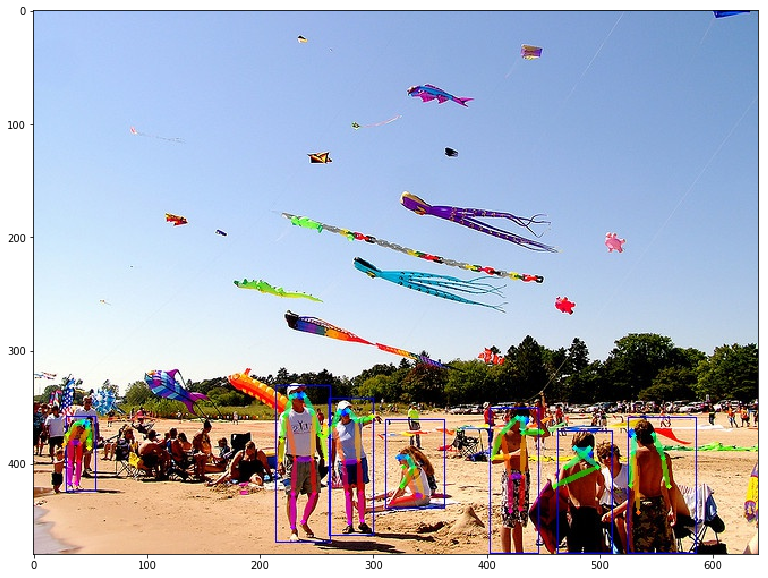

In [8]:
# 可视化预测图片

import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('output/000000570688_vis.jpg')
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

至此，我们已经走通了模型训练到预测的完整流程。

### 利用Paddle Lite实现移动端部署

In [9]:
# 安装Paddle Lite工具
!pip install -U paddlelite -i https://mirror.baidu.com/pypi/simple --pre

# 转化Paddle Lite推理使用的.nb模型
!paddle_lite_opt --model_dir=output_inference/picodet_s_320_pedestrian --valid_targets=arm --optimize_out=picodet_s_320_pedestrian
!paddle_lite_opt --model_dir=output_inference/tinypose_128x96 --valid_targets=arm --optimize_out=tinypose_128x96

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 46.8 MB 8.3 MB/s            
Loading topology data from output_inference/picodet_s_320_pedestrian/model.pdmodel
Loading params data from output_inference/picodet_s_320_pedestrian/model.pdiparams
1. Model is successfully loaded!
2. Model is optimized and saved into picodet_s_320_pedestrian.nb successfully
Loading topology data from output_inference/tinypose_128x96/model.pdmodel
Loading params data from output_inference/tinypose_128x96/model.pdiparams
1. Model is successfully loaded!
2. Model is optimized and saved into tinypose_128x96.nb successfully


这样我们就得到了供Paddle Lite使用的`.nb`文件，如果希望运行在移动端上，请参考[这里](https://github.com/PaddlePaddle/PaddleDetection/blob/release/2.3/deploy/lite/README.md)

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 